<img src="https://upload.wikimedia.org/wikipedia/en/thumb/b/b0/Adelphi_Panthers_current_logo.svg/375px-Adelphi_Panthers_current_logo.svg.png" width="375px" height="160px">

<p style="text-align: left;"><span style="font-family: Arial, Helvetica, sans-serif; font-size: 25px;"><strong><span style="color: rgb(209, 72, 65);">Sprint 7</span></strong></span></p>

<p><strong><span style="color: rgb(26, 188, 156); font-size: 25px;">Group 1 - Chensheng, Xuan, Liam</span></strong></p>

<p><a href="https://drive.google.com/file/d/1Di9GUfaDe_wmLetDmDS6HysQPygyWQ4_/view?usp=sharing"><span style="color: rgb(65, 168, 95);"><strong><span style="font-size: 25px;">Link to our presentation</span></strong></span></a><span style="color: rgb(65, 168, 95);"><strong><span style="font-size: 20px;"><a href="https://drive.google.com/file/d/1Di9GUfaDe_wmLetDmDS6HysQPygyWQ4_/view?usp=sharing"></a> if Professor is interested</span></strong></span></p>

<p><strong><span style="color: rgb(61, 142, 185); font-size: 30px;">Import Libraries</span></strong></p>

In [1]:
import pandas as pd  
import numpy as np  
import plotly.io as pio
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
from sklearn.svm import SVR
import plotly.express as px
import cufflinks as cf
from yellowbrick.regressor import ResidualsPlot 
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import plotly
import plotly.figure_factory as ff
import pickle

In [2]:
init_notebook_mode(connected=True)

In [3]:
cf.go_offline()

<p><strong><span style="color: rgb(61, 142, 185); font-size: 40px;">Data without 2020</span></strong></p>

In [4]:
df = pd.read_csv("sprint7.csv") #prepare dataset

In [5]:
df.index = pd.to_datetime(df["date"])

<p><strong><span style="color: rgb(61, 142, 185); font-size: 30px;">Standardization Transformation</span></strong></p>

In [6]:
dfStd=(df-df.mean())/df.std()

In [7]:
#10 features
features = dfStd[['Housing_total_sales_NO_SI','Gray_cement_dispatch_contractor','RADAR_Tools'
,'Housing_total_launch_NO_SI','Housing_total_sales','Gray_cement_dispatch_other','RADAR_Plumbinglag_3','Housing_total_launch_NO_SIlag_4','Seasonal','Offshore_microcredit_loans']]

In [8]:
name=list(features)

In [9]:
target=dfStd[['Quantity']]

In [10]:
#define X(features), and y(label)
Xstd =features

ystd = target 

<p><strong><span style="color: rgb(61, 142, 185); font-size: 30px;">Heat Map--Correlation</span></strong></p>

In [11]:
corrs = features.corr()
figure = ff.create_annotated_heatmap(z=corrs.values,x=list(corrs.columns),y=list(corrs.index), annotation_text=corrs.round(2).values,showscale=True,colorscale="blues")

<p><strong><span style="color: rgb(61, 142, 185); font-size: 30px;">1.Support Vector Machine Regression</span></strong></p>

In [12]:
#split testing and training set
X_train, X_test, y_train, y_test = train_test_split(Xstd,ystd,test_size=0.25,random_state=42) 

In [13]:
SVReg = SVR(kernel = 'linear',C=2,epsilon=0.2) 
SVReg.fit(X_train, y_train.values.ravel()) #train the model

y_pred_Train = SVReg.predict(X_train) 
y_pred_Test = SVReg.predict(X_test) 
#show Training Metrics and Testing Metrics
print('Training Metrics:')
print('R squared:', metrics.r2_score(y_train, y_pred_Train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_Train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_Train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_Train)))

print('\nTesting Metrics:')
print('R squared:', metrics.r2_score(y_test, y_pred_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))

Training Metrics:
R squared: 0.8229853456278702
Mean Absolute Error: 0.30454132150801483
Mean Squared Error: 0.13524163089952712
Root Mean Squared Error: 0.367752132420095

Testing Metrics:
R squared: 0.8987589015416149
Mean Absolute Error: 0.3220724685425985
Mean Squared Error: 0.1655052934727105
Root Mean Squared Error: 0.40682341804855643


<p><strong><span style="color: rgb(61, 142, 185); font-size: 25px;">Box Plots - (R Squared, MAE, MSE)</span></strong></p>

In [14]:
#!! change the first two lines after for loop to the model with configrutation and the fit.
# And delete the # before the .show line.
#This will show boxplots.

In [15]:
R2 = [] 
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(Xstd,ystd,test_size=0.25) 
    SVReg = SVR(kernel = 'linear',C=2,epsilon=0.2) 
    SVReg.fit(X_train, y_train.values.ravel()) #train the model
    y_pred_Test  = SVReg.predict(X_test)  
    R2.append(metrics.r2_score(y_test, y_pred_Test))

fig1 = px.box(R2)
#fig1.show()

In [16]:
MAE = [] 
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(Xstd,ystd,test_size=0.25) 
    SVReg = SVR(kernel = 'linear',C=2,epsilon=0.2) 
    SVReg.fit(X_train, y_train.values.ravel()) #train the model
    y_pred_Test  = SVReg.predict(X_test)  
    MAE.append(metrics.mean_absolute_error(y_test, y_pred_Test))

fig2 = px.box(MAE)
#fig2.show()

In [17]:
MSE = [] 
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(Xstd,ystd,test_size=0.25) 
    SVReg = SVR(kernel = 'linear',C=2,epsilon=0.2) 
    SVReg.fit(X_train, y_train.values.ravel()) #train the model
    y_pred_Test  = SVReg.predict(X_test)  
    MSE.append(metrics.mean_squared_error(y_test, y_pred_Test))

fig3 = px.box(MSE)
#fig3.show()

<p><strong><span style="color: rgb(61, 142, 185); font-size: 30px;">2.Ridge Regression</span></strong></p>

In [18]:
#split testing and training set
X_train, X_test, y_train, y_test = train_test_split(Xstd,ystd,test_size=0.25,random_state=42) 

In [19]:
RidgeReg = Ridge(normalize=True,alpha=0.01,tol=0.001,max_iter=2000)  
RidgeReg.fit(X_train, y_train) #train the model

y_pred_Train = RidgeReg.predict(X_train) 
y_pred_Test  = RidgeReg.predict(X_test)
#show Training and Testing Metrics
print('Training Metrics:')
print('R squared:', metrics.r2_score(y_train, y_pred_Train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_Train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_Train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_Train)))

print('\nTesting Metrics:')
print('R squared:', metrics.r2_score(y_test, y_pred_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))

Training Metrics:
R squared: 0.8297569444513031
Mean Absolute Error: 0.3018142569168214
Mean Squared Error: 0.1300680362503906
Root Mean Squared Error: 0.36064946450867025

Testing Metrics:
R squared: 0.9021347876241389
Mean Absolute Error: 0.32789154500662643
Mean Squared Error: 0.1599865167572618
Root Mean Squared Error: 0.3999831455914884


<p><strong><span style="color: rgb(61, 142, 185); font-size: 30px;">3.Multiple Linear Regression</span></strong></p>

In [20]:
#split testing and training set
X_train, X_test, y_train, y_test = train_test_split(Xstd,ystd,test_size=0.25,random_state=42) 

In [21]:
LinearReg = LinearRegression(normalize=True)  
lr = LinearReg.fit(X_train, y_train) #train the model

y_pred_Train = LinearReg.predict(X_train) 
y_pred_Test  = LinearReg.predict(X_test)
#show Training and Testing Metrics
print('Training Metrics:')
print('R squared:', metrics.r2_score(y_train, y_pred_Train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_Train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_Train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_Train)))

print('\nTesting Metrics:')
print('R squared:', metrics.r2_score(y_test, y_pred_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test))) 

Training Metrics:
R squared: 0.829783817328369
Mean Absolute Error: 0.30181505506879586
Mean Squared Error: 0.13004750500265722
Root Mean Squared Error: 0.3606209991149395

Testing Metrics:
R squared: 0.9021575129730091
Mean Absolute Error: 0.3278331114982842
Mean Squared Error: 0.15994936617719807
Root Mean Squared Error: 0.39993670271331444


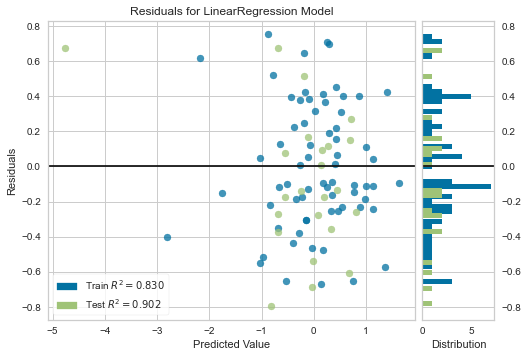

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [22]:
#Residual Plot of Linear Regression
LinearReg = LinearRegression(normalize=True) 
visualizer = ResidualsPlot(LinearReg)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

<p><strong><span style="color: rgb(61, 142, 185); font-size: 25px;">Features of Importance Chart</span></strong></p>

In [23]:
#!!try to run different 3 models individually by changing the LinearReg to RidgeReg or SVReg, you could get Importance Chart for each model

In [24]:
colors = ['Positive' if c > 0 else 'Negative' for c in LinearReg.coef_[0]]

fig = px.bar(
    x=X_train.columns, y=LinearReg.coef_[0], color=colors,
    color_discrete_sequence=['red', 'blue'],
    labels=dict(x='Feature', y='Linear coefficient'),
    title='Weight of each feature for predicting Quantity'
)

<p><strong><span style="color: rgb(61, 142, 185); font-size: 25px;">Time Series Graph</span></strong></p>

In [25]:
#!!try to run different 3 models individually, you could get different Time Series Graph for each model

In [26]:
X_test.sort_values("date",inplace=True)
y_test.sort_values("date",inplace=True)

In [ ]:
figure999=go.Figure()
figure999.add_trace(go.Scatter(x=X_test.index,y=y_test.values.flatten(),name='Actual'))
figure999.update_layout(title={
        'text': "Timeseries Graph(without2020)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)
figure999.add_trace(go.Scatter(x=X_test.index, y=y_pred_Test.flatten(),
                    line=dict(color='red', width=1),
                    mode='lines',
                    name='Prediction')
                    )
figure999.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure999.update_layout(title={
        'text': "Timeseries Graph(without2020)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

<p><strong><span style="color: rgb(176, 92, 250); font-size: 40px;">Data with 2020</span></strong></p>

In [28]:
df1 = pd.read_csv("sprint7with2020.csv") #prepare dataset

In [29]:
df1.index = pd.to_datetime(df1["date"])

In [30]:
dfStd1=(df1-df1.mean())/df1.std() #Standardization

In [31]:
#10 features
features2=dfStd1[['Housing_total_sales_NO_SI','Gray_cement_dispatch_contractor','RADAR_Tools'
,'Housing_total_launch_NO_SI','Housing_total_sales','Gray_cement_dispatch_other','RADAR_Plumbinglag_3','Housing_total_launch_NO_SIlag_4','Seasonal','Offshore_microcredit_loans']]

In [32]:
target1=dfStd1[['Quantity']]

In [33]:
#define X, y
Xstd1 =features2

ystd1 = target1

In [34]:
#split testing and training sets
X_train, X_test, y_train, y_test = train_test_split(Xstd1,ystd1,test_size=0.25,random_state=60000) 

In [35]:
name1=list(features2)

<p><strong><span style="color: rgb(176, 92, 250); font-size: 30px;">1.Support Vector Machine Regression(The Best)</span></strong></p>

In [36]:
SVReg = SVR(kernel = 'linear',C=2,epsilon=0.2) 
SVReg.fit(X_train, y_train.values.ravel()) #train the model

y_pred_Train = SVReg.predict(X_train) 
y_pred_Test = SVReg.predict(X_test) 

print('Training Metrics:')
print('R squared:', metrics.r2_score(y_train, y_pred_Train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_Train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_Train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_Train)))

print('\nTesting Metrics:')
print('R squared:', metrics.r2_score(y_test, y_pred_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))

Training Metrics:
R squared: 0.7008272989028212
Mean Absolute Error: 0.33637523479818615
Mean Squared Error: 0.16905712162286324
Root Mean Squared Error: 0.41116556473379823

Testing Metrics:
R squared: 0.9090677902662546
Mean Absolute Error: 0.33724280668116485
Mean Squared Error: 0.20035180371388273
Root Mean Squared Error: 0.4476067511933692


<p><strong><span style="color: rgb(176, 92, 250); font-size: 25px;">Time Series Graph</span></strong></p>

In [37]:
#!!try to run different 3 models individually, you could get different Time Series Graph for each model

In [38]:
X_test.sort_values("date",inplace=True)
y_test.sort_values("date",inplace=True)

In [39]:
figure999=go.Figure()
figure999.add_trace(go.Scatter(x=X_test.index,y=y_test.values.flatten(),name='Actual'))
figure999.update_layout(title={
        'text': "Timeseries Graph(with2020)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)
figure999.add_trace(go.Scatter(x=X_test.index, y=y_pred_Test.flatten(),
                    line=dict(color='red', width=1),
                    mode='lines',
                    name='Prediction')
                    )
figure999.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure999.update_layout(title={
        'text': "Timeseries Graph(with2020)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

<p><strong><span style="color: rgb(176, 92, 250); font-size: 30px;">2.Multiple Linear Regression</span></strong></p>

In [40]:
#split testing and training sets
X_train, X_test, y_train, y_test = train_test_split(Xstd1,ystd1,test_size=0.25,random_state=60000)
LinearReg = LinearRegression(normalize=True)  
lr = LinearReg.fit(X_train, y_train) #train the model

y_pred_Train = LinearReg.predict(X_train) 
y_pred_Test  = LinearReg.predict(X_test) 

print('Training Metrics:')
print('R squared:', metrics.r2_score(y_train, y_pred_Train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_Train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_Train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_Train)))

print('\nTesting Metrics:')
print('R squared:', metrics.r2_score(y_test, y_pred_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))

Training Metrics:
R squared: 0.7175334319446368
Mean Absolute Error: 0.3318674626997802
Mean Squared Error: 0.15961678580632577
Root Mean Squared Error: 0.39952069509141297

Testing Metrics:
R squared: 0.901662888732303
Mean Absolute Error: 0.35020616669886606
Mean Squared Error: 0.21666709378540858
Root Mean Squared Error: 0.46547512692453136


In [41]:
colors = ['Positive' if c > 0 else 'Negative' for c in LinearReg.coef_[0]]

fig787 = px.bar(
    x=X_train.columns, y=LinearReg.coef_[0], color=colors,
    color_discrete_sequence=['red', 'blue'],
    labels=dict(x='Feature', y='Linear coefficient'),
    title='Weight of each feature for predicting Quantity'
)

<p><strong><span style="color: rgb(176, 92, 250); font-size: 30px;">3.Ridge Regression</span></strong></p>

In [42]:
#split testing and training sets
X_train, X_test, y_train, y_test = train_test_split(Xstd1,ystd1,test_size=0.25,random_state=60000)
RidgeReg = Ridge(normalize=True,alpha=0.01,tol=0.001,max_iter=2000)  
RidgeReg.fit(X_train, y_train) #train the model

y_pred_Train = RidgeReg.predict(X_train) 
y_pred_Test  = RidgeReg.predict(X_test)  

print('Training Metrics:')
print('R squared:', metrics.r2_score(y_train, y_pred_Train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_Train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_Train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_Train)))

print('\nTesting Metrics:')
print('R squared:', metrics.r2_score(y_test, y_pred_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))

Training Metrics:
R squared: 0.7174936902508193
Mean Absolute Error: 0.3315357246390147
Mean Squared Error: 0.15963924312392375
Root Mean Squared Error: 0.39954879942745886

Testing Metrics:
R squared: 0.9009196476795169
Mean Absolute Error: 0.35046486958626977
Mean Squared Error: 0.21830468387538793
Root Mean Squared Error: 0.4672308678537709


<p><strong><span style="color: rgb(176, 92, 250); font-size: 30px;">Save and Upload Trained Models</span></strong></p>

In [43]:
filename = 'finalized_model(LinearReg).sav'
pickle.dump(LinearReg, open(filename, 'wb'))

In [44]:
filename = 'finalized_model(RidgeReg).sav'
pickle.dump(RidgeReg, open(filename, 'wb'))

In [45]:
filename = 'finalized_model(SVReg).sav'
pickle.dump(SVReg, open(filename, 'wb'))